## How to construct and use the unityvr dataclass?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from unityvr.preproc import logproc as lp
from unityvr.viz import viz, utils

#### Generate data object

In [2]:
dirName = '../sample/'
fileName = 'Log_2021-05-19_18-25-15_SS96_x_7f_f07_EB_panA2_t01.json'
fileName

'Log_2021-05-19_18-25-15_SS96_x_7f_f07_EB_panA2_t01.json'

In [3]:
uvrTest = lp.constructUnityVRexperiment(dirName,fileName)
uvrTest.printMetadata()

correcting for Unity angle convention.
Metadata:

expid  :  SS96-x-7f_panA2
experiment  :  projectors on, panorama test, 144 Hz frame rate, SS96 > GCaMP7f in VK5
genotype  :  SS96-x-7f
sex  :  f
flyid  :  f07
trial  :  trial01
date  :  2021-05-19
time  :  18-25-15
ballRad  :  0.04699999839067459
setFrameRate  :  144
notes  :  EB imaging
angle_convention  :  right-handed


#### Use of object-functions

In [4]:
frameftDf = uvrTest.downsampleftDf()
frameftDf.head()

,frame,ficTracTReadMs,ficTracTWriteMs,dx,dy,dz
0,300.0,803.0,8.978112e+08,-0.066102,-0.018084,-0.213037
1,301.0,13731.0,1.402829e+10,-0.043861,-0.016346,0.211246
2,302.0,15074.0,1.524958e+10,0.011768,0.017827,0.297528
3,303.0,6705.0,6.766586e+09,-0.004305,-0.015544,-0.136331
4,304.0,2159.0,2.178511e+09,-0.007228,-0.006872,-0.042041


#### Plot trajectory

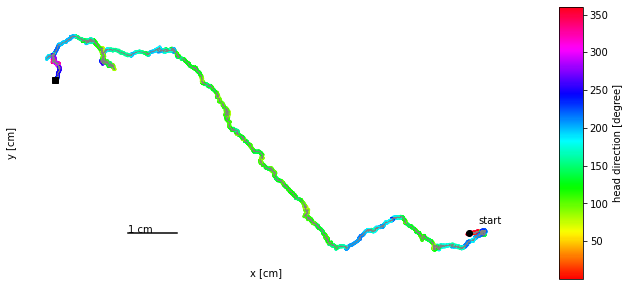

In [5]:
#conversion factor to cm
dc2cm = 10

fig, axs = viz.plotFlyPath(uvrTest, dc2cm, figsize=(10,5))
utils.pathPlotAxisTheme(axs[0],'cm')
utils.plotScaleBar(axs[0],1,(-7,0),'1 cm')

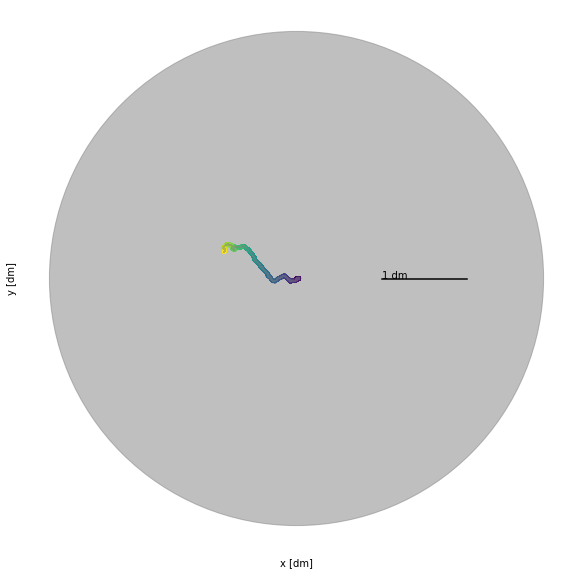

In [6]:
# Plot trajectory witth objects (all in decimeter)
fig, ax = viz.plotVRpathWithObjects(uvrTest,limx=[-np.inf, -np.inf],limy=[-np.inf, -np.inf], myfigsize=(10,10))
utils.pathPlotAxisTheme(ax,'dm')
utils.plotScaleBar(ax,1,(1,0),'1 dm')

#### Save object to file, load object from file

In [7]:
preprocDir = dirName #choose location for preprocessing (for simplicity here we use the sample directory)
savepath = uvrTest.saveData(preprocDir, uvrTest.metadata['trial'])
print(savepath)

../sample//trial01/uvr


In [8]:
uvrTest_loaded = lp.loadUVRData(savepath)
uvrTest_loaded.printMetadata()

Metadata:

expid  :  SS96-x-7f_panA2
experiment  :  projectors on, panorama test, 144 Hz frame rate, SS96 > GCaMP7f in VK5
genotype  :  SS96-x-7f
sex  :  f
flyid  :  f07
trial  :  trial01
date  :  2021-05-19
time  :  18-25-15
ballRad  :  0.04699999839067459
setFrameRate  :  144
notes  :  EB imaging
angle_convention  :  right-handed
